# ML Data Challenge 1 - Cargo Volume
Dominic Fernandez, University of San Francisco


<hr>

# Final Results (TLDR)

## Best Metric
The metric I am choosing to evaluate my model is `mean squared error (MSE)`. I am choosing MSE because it measures prediction errors well. At first, I was tempted to choose r-squared as my metric because it is easier and nicer to see a percentage as an accuracy score, but the objective of this challenge is to predict values for a test set that my model has not yet seen, so evaluating my model on prediction errors is of more value to me.

<b>My best MSE was <mark>(98.7996695985)^2 or 9761.374712765815</mark></b>

(For reference, my r-squared for the same model was <b>0.9498589744651128</b>)

## My Model
<b>My best performing model was a <mark>Random Forest Regressor</mark></b>.
- MSE: (98.7996695985)^2 or 9761.374712765815
- r-squared: 0.9498589744651128
- Execution time to predict target for test set: <b>0.19011902809143066 sec.</b>

### Models I explored in this challenge:
I explored  `linear regression` because there are some features I engineered that are pretty well correlated to the target variable (both negatively and positively, but more so positively correlated), so linear regression may be a suitable model. 

I explored `random forest regressor` because although there are some features that correlated with the target variable, not all of them do. Since random forest regressors are good at working with non-linear features, I am leveraging this model to account for the features I engineer that have a non-linear relationship with the target variable (and many likely will, since there are many more categorical features than continuous features in this dataset.  <b>Random forest regressor worked especially well after feature engineering values from 1 to N for each unique value in each categorical feature.</b>

## Output
See `dc1.csv` for the target variable predictions on the test set

<hr>

## Load and explore training data

In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509
1,200811,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194
2,200709,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999
3,201608,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530
4,201708,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420
...,...,...,...,...,...,...,...,...,...,...,...
27225,201108,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Express,Passenger,5.687690
27226,200703,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Mail,Freighter,3.473669
27227,201204,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,18.564941
27228,201005,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,9.814090


In [2]:
# Find null and NaN values
df.columns[df.isna().any()].tolist()

['Operating Airline IATA Code', 'Published Airline IATA Code']

In [3]:
# Drop rows with null or NaN values
df.fillna(0, inplace=True)

In [4]:
# Discover the unique values of features
for col in df.columns:
    print("## " + col + " ##")
    print(df[col].unique())

## Activity Period ##
[201601 200811 200709 201608 201708 201707 201210 201904 201407 202009
 201005 201606 201001 200809 201205 201007 201105 201710 202005 201609
 201006 201602 201912 201312 200507 200801 201512 200803 201804 201103
 201907 202001 201502 201604 201112 201107 201903 200911 201906 200903
 200905 201004 200808 201803 201611 201607 201908 201111 201812 200611
 201208 201404 201203 200810 200710 201712 200604 201701 201704 200602
 201901 201808 201810 201504 200607 201612 201310 200612 202008 201010
 201610 201305 200712 201801 200704 201008 201507 201201 200910 201304
 201002 201108 201011 201702 200605 201409 202011 200610 202006 200703
 201509 201711 200701 200711 200806 200707 201505 200606 200706 201212
 200902 200901 201902 201809 200511 201306 201805 201211 201003 201104
 201410 200909 200802 201501 201705 201206 201605 201408 201307 201503
 201401 201709 200812 200804 200509 201308 200807 201101 201910 200908
 200906 201109 202003 201508 200708 201202 200805 20160

In [5]:
# Exploring the Airline and Airline IATA Code columns
pd.set_option("display.max_rows", None)
df["Operating Airline IATA Code"].value_counts()

UA     4565
KE     1184
AS     1055
CI      971
OZ      969
BR      964
AC      816
DL      781
SQ      751
CX      718
JL      714
CA      610
AA      594
NZ      592
KL      571
AF      565
BA      562
LH      534
NH      532
PR      482
KZ      477
QF      454
US      432
SY      409
SK      408
LX      384
QX      323
NW      319
HA      305
VS      304
FX      303
F9      297
TA      296
EK      275
WN      256
OO      212
B6      203
K4      199
GB      197
EI      174
5Y      174
YX      172
CZ      166
MU      153
A8      145
2Q      114
CP      114
9S      101
TK       97
EY       92
CM       89
AI       85
CK       78
LP       73
FJ       65
CV       62
BF       58
WW       47
AB       47
KR       43
bxr      43
FI       42
TZ       34
AY       34
ER       34
0        31
HX       30
WI       27
IB       26
WO       23
LY       18
TP       17
DI       16
8C       15
IG       14
MQ       14
9W       12
RW       11
EZ       11
MT       10
DY        7
AM        7
5X        5
VX  

In [6]:
df["Published Airline IATA Code"].value_counts()

UA     4578
AS     1508
KE     1184
CI      971
OZ      969
BR      964
DL      853
AC      818
SQ      751
AA      722
CX      718
JL      714
CA      610
NZ      592
KL      571
AF      565
BA      562
LH      534
NH      532
PR      482
KZ      477
QF      454
US      437
SY      409
SK      408
LX      384
NW      319
HA      305
VS      304
FX      303
F9      297
TA      296
EK      275
WN      256
B6      203
K4      199
GB      197
EI      174
5Y      174
YX      172
CZ      166
MU      153
A8      145
2Q      114
9S      101
TK       97
EY       92
CM       89
AI       85
CK       78
LP       73
FJ       65
CV       62
BF       58
WW       47
AB       47
KR       43
bxr      43
FI       42
TZ       34
ER       34
AY       34
0        31
HX       30
WI       27
IB       26
WO       23
LY       18
TP       17
DI       16
8C       15
IG       14
9W       12
EZ       11
RW       11
MT       10
AM        7
DY        7
VX        5
5X        5
QR        2
Name: Published Airline IATA

In [7]:
df["Operating Airline"].value_counts()

United Airlines                            2551
United Airlines - Pre 07/01/2013           2014
Korean Air Lines                           1184
Alaska Airlines                            1055
China Airlines                              971
Asiana Airlines                             969
EVA Airways                                 964
Air Canada                                  816
Delta Air Lines                             781
Singapore Airlines                          751
Cathay Pacific                              718
Japan Airlines                              714
Air China                                   610
American Airlines                           594
Air New Zealand                             592
KLM Royal Dutch Airlines                    571
Air France                                  565
British Airways                             562
Lufthansa German Airlines                   534
All Nippon Airways                          532
Philippine Airlines                     

In [8]:
df["Published Airline"].value_counts()

United Airlines                            2557
United Airlines - Pre 07/01/2013           2021
Alaska Airlines                            1508
Korean Air Lines                           1184
China Airlines                              971
Asiana Airlines                             969
EVA Airways                                 964
Delta Air Lines                             853
Air Canada                                  818
Singapore Airlines                          751
American Airlines                           722
Cathay Pacific                              718
Japan Airlines                              714
Air China                                   610
Air New Zealand                             592
KLM Royal Dutch Airlines                    571
Air France                                  565
British Airways                             562
Lufthansa German Airlines                   534
All Nippon Airways                          532
Philippine Airlines                     

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27230 entries, 0 to 27229
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              27230 non-null  int64  
 1   Operating Airline            27230 non-null  object 
 2   Operating Airline IATA Code  27230 non-null  object 
 3   Published Airline            27230 non-null  object 
 4   Published Airline IATA Code  27230 non-null  object 
 5   GEO Summary                  27230 non-null  object 
 6   GEO Region                   27230 non-null  object 
 7   Activity Type Code           27230 non-null  object 
 8   Cargo Type Code              27230 non-null  object 
 9   Cargo Aircraft Type          27230 non-null  object 
 10  Cargo Metric TONS            27230 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 2.3+ MB


In [10]:
pd.set_option("display.max_rows", False)

### Initial Observations

Numreical features:
- Activity Period
- Cargo Metric TONS

Categorical features with few unique values:
- GEO Summary
- Activity Type Code
- Cargo Type Code
- Cargo Aircraft Type

Categorical features with several unique values:
- Activity Period
- Operating Airline
- Operating Airline IATA Code
- Published Airline
- Published Airline IATA Code

Going to discard the `Operating Airline` and `Published Airline` features and just use the IATA code to identify the airlines. Feels simpler to deal with the codes rather than the longer names of the airlines.

## Feature Selection & Engineering [0]

Extract year and month from `Activity Period`

In [11]:
df["year"] = df["Activity Period"].astype(str).str.slice(0, 4).astype(int)
df["month"] = df["Activity Period"].astype(str).str.slice(4, 6).astype(int)
df["day"] = 1

df["date"] = pd.to_datetime(pd.DataFrame({
    "year": df["year"],
    "month": df["month"],
    "day": df["day"]
}))

df.drop(columns=["day", "Activity Period"], axis=1, inplace=True)
df

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS,year,month,date
0,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509,2016,1,2016-01-01
1,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194,2008,11,2008-11-01
2,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999,2007,9,2007-09-01
3,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530,2016,8,2016-08-01
4,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420,2017,8,2017-08-01
5,Nippon Cargo Airlines,KZ,Nippon Cargo Airlines,KZ,International,Asia,Enplaned,Cargo,Freighter,799.951270,2017,7,2017-07-01
6,Lufthansa German Airlines,LH,Lufthansa German Airlines,LH,International,Europe,Deplaned,Cargo,Passenger,508.416199,2012,10,2012-10-01
7,"COPA Airlines, Inc.",CM,"COPA Airlines, Inc.",CM,International,Central America,Deplaned,Cargo,Passenger,1.534982,2019,4,2019-04-01
8,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Mail,Passenger,1040.448175,2014,7,2014-07-01
9,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Deplaned,Express,Passenger,0.703080,2020,9,2020-09-01


Discarding `Operating Airline` and `Published Airline` and using the IATA codes to identify the airlines instead

In [12]:
df.drop(columns=["Operating Airline", "Published Airline"], axis=1, inplace=True)
df

,Operating Airline IATA Code,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS,year,month,date
0,SY,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509,2016,1,2016-01-01
1,UA,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194,2008,11,2008-11-01
2,QF,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999,2007,9,2007-09-01
3,PR,PR,International,Asia,Deplaned,Mail,Passenger,19.023530,2016,8,2016-08-01
4,SQ,SQ,International,Asia,Deplaned,Express,Passenger,6.951420,2017,8,2017-08-01
5,KZ,KZ,International,Asia,Enplaned,Cargo,Freighter,799.951270,2017,7,2017-07-01
6,LH,LH,International,Europe,Deplaned,Cargo,Passenger,508.416199,2012,10,2012-10-01
7,CM,CM,International,Central America,Deplaned,Cargo,Passenger,1.534982,2019,4,2019-04-01
8,UA,UA,Domestic,US,Deplaned,Mail,Passenger,1040.448175,2014,7,2014-07-01
9,AS,AS,Domestic,US,Deplaned,Express,Passenger,0.703080,2020,9,2020-09-01


Renaming `Operating Airline IATA Code` and `Published Airline IATA Code` to `operating_airline` and `published_airline`

In [13]:
df.rename(columns={"Operating Airline IATA Code": "operating_airline", "Published Airline IATA Code": "published_airline"}, inplace=True)
df

,operating_airline,published_airline,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS,year,month,date
0,SY,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509,2016,1,2016-01-01
1,UA,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194,2008,11,2008-11-01
2,QF,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999,2007,9,2007-09-01
3,PR,PR,International,Asia,Deplaned,Mail,Passenger,19.023530,2016,8,2016-08-01
4,SQ,SQ,International,Asia,Deplaned,Express,Passenger,6.951420,2017,8,2017-08-01
5,KZ,KZ,International,Asia,Enplaned,Cargo,Freighter,799.951270,2017,7,2017-07-01
6,LH,LH,International,Europe,Deplaned,Cargo,Passenger,508.416199,2012,10,2012-10-01
7,CM,CM,International,Central America,Deplaned,Cargo,Passenger,1.534982,2019,4,2019-04-01
8,UA,UA,Domestic,US,Deplaned,Mail,Passenger,1040.448175,2014,7,2014-07-01
9,AS,AS,Domestic,US,Deplaned,Express,Passenger,0.703080,2020,9,2020-09-01


## EDA

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot: title={'center': 'Mean of Cargo Metric TONS Overtime'}, xlabel='date', ylabel='Mean Cargo Metric TONS'>

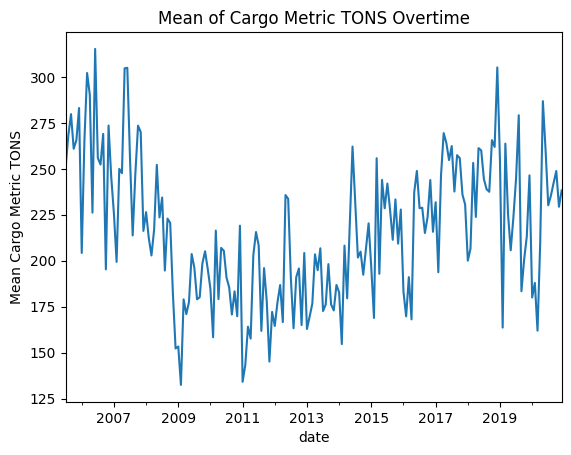

In [15]:
# Mean of target variable over time
plt.xlabel("Time")
plt.ylabel("Mean Cargo Metric TONS")
plt.title("Mean of Cargo Metric TONS Overtime")
df.groupby(["date"])["Cargo Metric TONS"].mean().plot(kind="line")

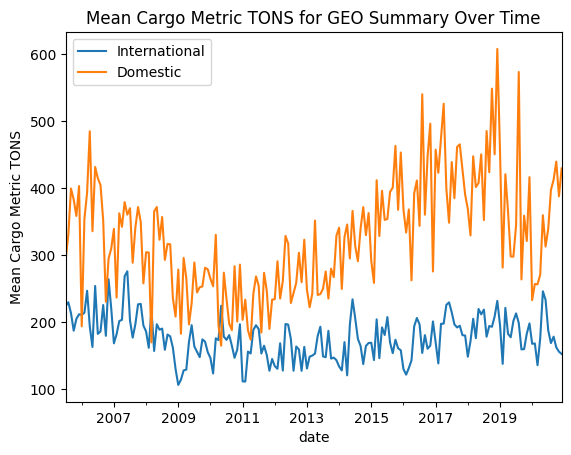

In [16]:
avg_carg_inter = df[df["GEO Summary"] == "International"].groupby("date")["Cargo Metric TONS"].agg("mean")
avg_carg_dom = df[df["GEO Summary"] == "Domestic"].groupby("date")["Cargo Metric TONS"].agg("mean")

avg_carg_inter.rename("International", inplace=True)
avg_carg_dom.rename("Domestic", inplace=True)

plt.ylabel("Mean Cargo Metric TONS")
plt.title("Mean Cargo Metric TONS for GEO Summary Over Time")
avg_carg_inter.plot(legend=True)
avg_carg_dom.plot(legend=True)
plt.show()

<AxesSubplot: title={'center': 'Distribution of GEO Summary'}, xlabel='GEO Summary', ylabel='Count'>

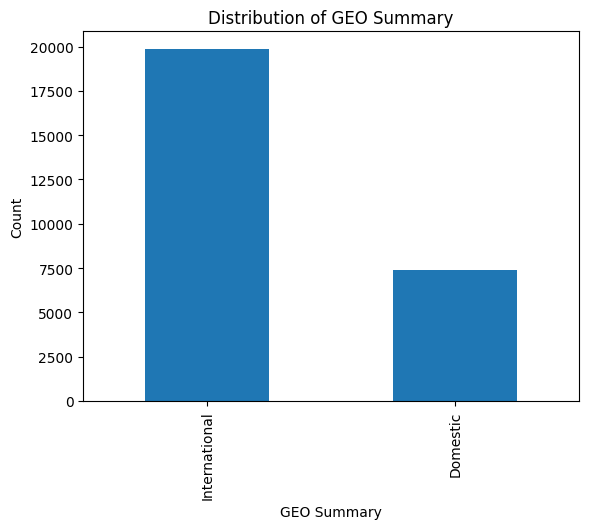

In [17]:
plt.xlabel("GEO Summary")
plt.ylabel("Count")
plt.title("Distribution of GEO Summary")
df["GEO Summary"].value_counts().plot(kind="bar")

<AxesSubplot: title={'center': 'Mean Cargo Metric TONS of GEO Region Over Time'}, xlabel='GEO Region', ylabel='Mean Cargo Metric TONS'>

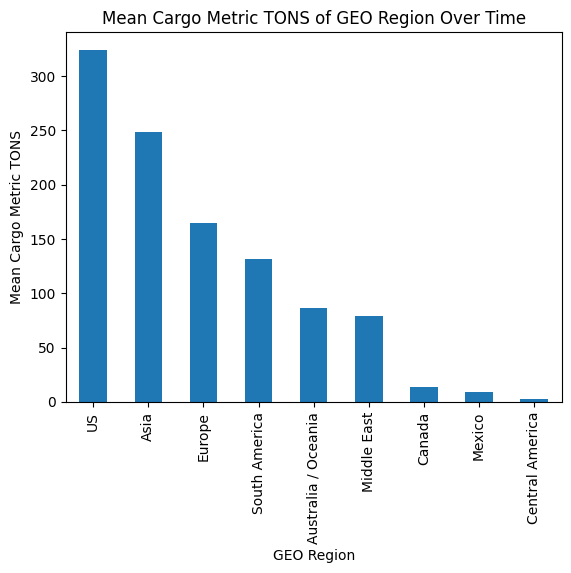

In [18]:
plt.xlabel("GEO Region")
plt.ylabel("Mean Cargo Metric TONS")
plt.title("Mean Cargo Metric TONS of GEO Region Over Time")
df.groupby(["GEO Region"])["Cargo Metric TONS"].mean().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot: title={'center': 'Distribution of GEO Region'}, xlabel='GEO Region', ylabel='Count'>

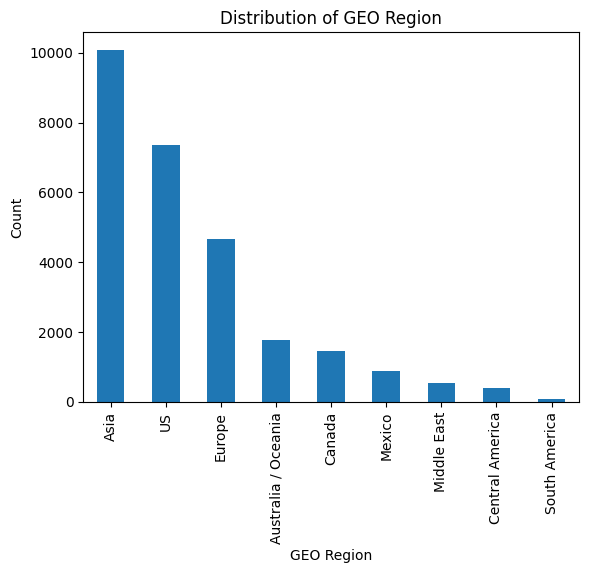

In [19]:
plt.xlabel("GEO Region")
plt.ylabel("Count")
plt.title("Distribution of GEO Region")
df["GEO Region"].value_counts().plot(kind="bar")

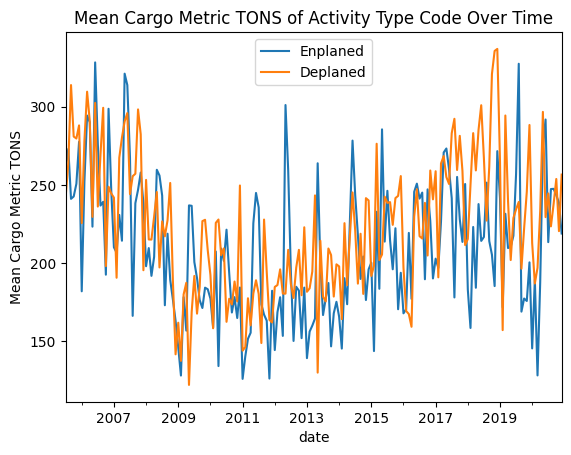

In [20]:
avg_carg_enpl = df[df["Activity Type Code"] == "Enplaned"].groupby("date")["Cargo Metric TONS"].agg("mean")
avg_carg_depl = df[df["Activity Type Code"] == "Deplaned"].groupby("date")["Cargo Metric TONS"].agg("mean")

avg_carg_enpl.rename("Enplaned", inplace=True)
avg_carg_depl.rename("Deplaned", inplace=True)

plt.ylabel("Mean Cargo Metric TONS")
plt.title("Mean Cargo Metric TONS of Activity Type Code Over Time")
avg_carg_enpl.plot(legend=True)
avg_carg_depl.plot(legend=True)
plt.show()

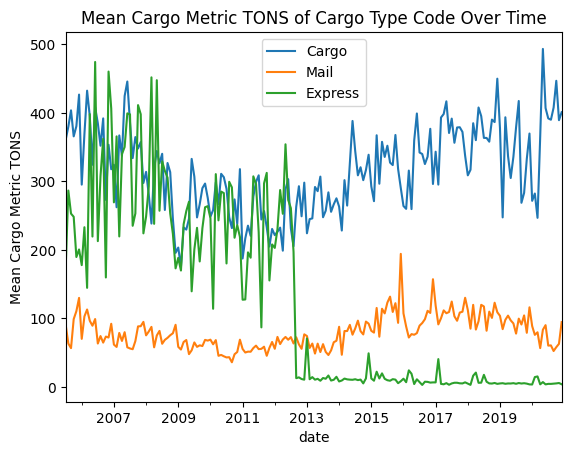

In [21]:
avg_carg_carg = df[df["Cargo Type Code"] == "Cargo"].groupby("date")["Cargo Metric TONS"].agg("mean")
avg_carg_mail = df[df["Cargo Type Code"] == "Mail"].groupby("date")["Cargo Metric TONS"].agg("mean")
avg_carg_expr = df[df["Cargo Type Code"] == "Express"].groupby("date")["Cargo Metric TONS"].agg("mean")

avg_carg_carg.rename("Cargo", inplace=True)
avg_carg_mail.rename("Mail", inplace=True)
avg_carg_expr.rename("Express", inplace=True)

plt.ylabel("Mean Cargo Metric TONS")
plt.title("Mean Cargo Metric TONS of Cargo Type Code Over Time")
avg_carg_carg.plot(legend=True)
avg_carg_mail.plot(legend=True)
avg_carg_expr.plot(legend=True)
plt.show()

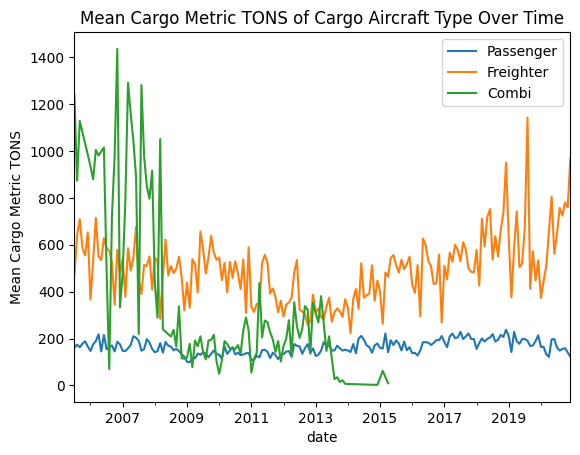

In [22]:
avg_carg_pass = df[df["Cargo Aircraft Type"] == "Passenger"].groupby("date")["Cargo Metric TONS"].agg("mean")
avg_carg_frei = df[df["Cargo Aircraft Type"] == "Freighter"].groupby("date")["Cargo Metric TONS"].agg("mean")
avg_carg_combi = df[df["Cargo Aircraft Type"] == "Combi"].groupby("date")["Cargo Metric TONS"].agg("mean")

avg_carg_pass.rename("Passenger", inplace=True)
avg_carg_frei.rename("Freighter", inplace=True)
avg_carg_combi.rename("Combi", inplace=True)

plt.ylabel("Mean Cargo Metric TONS")
plt.title("Mean Cargo Metric TONS of Cargo Aircraft Type Over Time")
avg_carg_pass.plot(legend=True)
avg_carg_frei.plot(legend=True)
avg_carg_combi.plot(legend=True)
plt.show()

### Observations from EDA
- The difference in distribution of the each categorical field is pretty large. For example, Asia in the `GEO Region` feature appears ~300 more times than South Africa.
- The Combi value for the `Cargo Aircraft Type` doesn't appear after approximately 2016.
- There doesn't seem to be any linear correlation between `date` and `Cargo Metric TONS`, which means I'll likely have to perform more feature engineering to derive anything meaningful to correlate with the target variable.

## Feature Engineering [1]
- One hot encoding the categorical features with few distinct values. Choosing one hot encoding as a simple way to convert categorical values to numeric while still preserving the utility of the categorical value.
- Target encoding the categorical features with many distinct values with the mean `Cargo Metric TONS` of each value grouped by the date. Choosing to do this to see if there are any correlations between our target variable and the averages of each category grouped by date. If there are linear correlations, linear regression models may possibly be used.
- Assigning counts to `operating_airline`, `published_airline`, `GEO Region`, as one hot encoding would not be efficient for these categorical features (since they have many unique values and can make the dataset too sparse), but we still need to convert these features to numerical values.

In [23]:
df1 = pd.DataFrame(df)

In [24]:
# Assigning averages 
cols = df1.columns.tolist()
for col in cols:
    if df1[col].dtype == "object":
        avgs = df1.groupby(["year", "month", col])["Cargo Metric TONS"].mean().reset_index(name=col+"_avg")
        df1 = pd.merge(df1, avgs, on=["year", "month", col], how="left")
df1.drop(columns=["date"], axis=1, inplace=True)
df1

,operating_airline,published_airline,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS,year,month,operating_airline_avg,published_airline_avg,GEO Summary_avg,GEO Region_avg,Activity Type Code_avg,Cargo Type Code_avg,Cargo Aircraft Type_avg
0,SY,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509,2016,1,5.549796,5.549796,368.055349,368.055349,167.699982,264.065072,138.130450
1,UA,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194,2008,11,272.906605,272.906605,235.227760,235.227760,188.453389,245.001147,132.298818
2,QF,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999,2007,9,39.468643,39.468643,196.472492,93.515816,257.088656,253.208262,154.541770
3,PR,PR,International,Asia,Deplaned,Mail,Passenger,19.023530,2016,8,145.387645,145.387645,153.598739,247.340360,215.605860,93.332169,172.369145
4,SQ,SQ,International,Asia,Deplaned,Express,Passenger,6.951420,2017,8,254.701390,254.701390,196.274561,323.521119,292.269617,6.201370,197.714413
5,KZ,KZ,International,Asia,Enplaned,Cargo,Freighter,799.951270,2017,7,412.876094,412.876094,214.384039,371.468290,241.447800,391.546977,529.383758
6,LH,LH,International,Europe,Deplaned,Cargo,Passenger,508.416199,2012,10,313.847806,313.847806,158.852993,206.426329,208.351560,292.929920,176.315726
7,CM,CM,International,Central America,Deplaned,Cargo,Passenger,1.534982,2019,4,1.534982,1.534982,182.088351,1.426723,239.608024,336.936301,187.937938
8,UA,UA,Domestic,US,Deplaned,Mail,Passenger,1040.448175,2014,7,489.759661,489.759661,313.443950,313.443950,220.608914,85.371656,195.030819
9,AS,AS,Domestic,US,Deplaned,Express,Passenger,0.703080,2020,9,35.329349,18.995461,412.472012,412.472012,237.709447,4.882860,155.570890


In [25]:
# one hot encode features with few distinct values
df1 = pd.get_dummies(df1, columns=["GEO Summary", "Activity Type Code", "Cargo Type Code", "Cargo Aircraft Type"])
df1

,operating_airline,published_airline,GEO Region,Cargo Metric TONS,year,month,operating_airline_avg,published_airline_avg,GEO Summary_avg,GEO Region_avg,...,GEO Summary_Domestic,GEO Summary_International,Activity Type Code_Deplaned,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger
0,SY,SY,US,8.871509,2016,1,5.549796,5.549796,368.055349,368.055349,...,1,0,0,1,1,0,0,0,0,1
1,UA,UA,US,53.946194,2008,11,272.906605,272.906605,235.227760,235.227760,...,1,0,1,0,1,0,0,0,0,1
2,QF,QF,Australia / Oceania,0.043999,2007,9,39.468643,39.468643,196.472492,93.515816,...,0,1,1,0,0,1,0,0,0,1
3,PR,PR,Asia,19.023530,2016,8,145.387645,145.387645,153.598739,247.340360,...,0,1,1,0,0,0,1,0,0,1
4,SQ,SQ,Asia,6.951420,2017,8,254.701390,254.701390,196.274561,323.521119,...,0,1,1,0,0,1,0,0,0,1
5,KZ,KZ,Asia,799.951270,2017,7,412.876094,412.876094,214.384039,371.468290,...,0,1,0,1,1,0,0,0,1,0
6,LH,LH,Europe,508.416199,2012,10,313.847806,313.847806,158.852993,206.426329,...,0,1,1,0,1,0,0,0,0,1
7,CM,CM,Central America,1.534982,2019,4,1.534982,1.534982,182.088351,1.426723,...,0,1,1,0,1,0,0,0,0,1
8,UA,UA,US,1040.448175,2014,7,489.759661,489.759661,313.443950,313.443950,...,1,0,1,0,0,0,1,0,0,1
9,AS,AS,US,0.703080,2020,9,35.329349,18.995461,412.472012,412.472012,...,1,0,1,0,0,1,0,0,0,1


In [26]:
# Assigning counts
op_airline_freq_df = df1["operating_airline"].value_counts().reset_index(name="operating_airline_freq").rename(columns={"index": "operating_airline"})
df1 = pd.merge(df1, op_airline_freq_df, on=["operating_airline"], how="left")

pub_airline_freq_df = df1["published_airline"].value_counts().reset_index(name="published_airline_freq").rename(columns={"index": "published_airline"})
df1 = pd.merge(df1, pub_airline_freq_df, on=["published_airline"], how="left")

region_freq_df = df1["GEO Region"].value_counts().reset_index(name="region_freq").rename(columns={"index": "GEO Region"})
df1 = pd.merge(df1, region_freq_df, on=["GEO Region"], how="left")

df1.drop(columns=["operating_airline", "published_airline", "GEO Region", "year", "month"], axis=1, inplace=True)
df1

,Cargo Metric TONS,operating_airline_avg,published_airline_avg,GEO Summary_avg,GEO Region_avg,Activity Type Code_avg,Cargo Type Code_avg,Cargo Aircraft Type_avg,GEO Summary_Domestic,GEO Summary_International,...,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger,operating_airline_freq,published_airline_freq,region_freq
0,8.871509,5.549796,5.549796,368.055349,368.055349,167.699982,264.065072,138.130450,1,0,...,1,1,0,0,0,0,1,409,409,7365
1,53.946194,272.906605,272.906605,235.227760,235.227760,188.453389,245.001147,132.298818,1,0,...,0,1,0,0,0,0,1,4565,4578,7365
2,0.043999,39.468643,39.468643,196.472492,93.515816,257.088656,253.208262,154.541770,0,1,...,0,0,1,0,0,0,1,454,454,1758
3,19.023530,145.387645,145.387645,153.598739,247.340360,215.605860,93.332169,172.369145,0,1,...,0,0,0,1,0,0,1,482,482,10082
4,6.951420,254.701390,254.701390,196.274561,323.521119,292.269617,6.201370,197.714413,0,1,...,0,0,1,0,0,0,1,751,751,10082
5,799.951270,412.876094,412.876094,214.384039,371.468290,241.447800,391.546977,529.383758,0,1,...,1,1,0,0,0,1,0,477,477,10082
6,508.416199,313.847806,313.847806,158.852993,206.426329,208.351560,292.929920,176.315726,0,1,...,0,1,0,0,0,0,1,534,534,4669
7,1.534982,1.534982,1.534982,182.088351,1.426723,239.608024,336.936301,187.937938,0,1,...,0,1,0,0,0,0,1,89,89,385
8,1040.448175,489.759661,489.759661,313.443950,313.443950,220.608914,85.371656,195.030819,1,0,...,0,0,0,1,0,0,1,4565,4578,7365
9,0.703080,35.329349,18.995461,412.472012,412.472012,237.709447,4.882860,155.570890,1,0,...,0,0,1,0,0,0,1,1055,1508,7365


In [27]:
# Drop categorical features now
to_remove = [col for col in df1.columns if df1[col].dtype == "object"]
df1.drop(columns=to_remove, axis=1, inplace=True)
df1

,Cargo Metric TONS,operating_airline_avg,published_airline_avg,GEO Summary_avg,GEO Region_avg,Activity Type Code_avg,Cargo Type Code_avg,Cargo Aircraft Type_avg,GEO Summary_Domestic,GEO Summary_International,...,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger,operating_airline_freq,published_airline_freq,region_freq
0,8.871509,5.549796,5.549796,368.055349,368.055349,167.699982,264.065072,138.130450,1,0,...,1,1,0,0,0,0,1,409,409,7365
1,53.946194,272.906605,272.906605,235.227760,235.227760,188.453389,245.001147,132.298818,1,0,...,0,1,0,0,0,0,1,4565,4578,7365
2,0.043999,39.468643,39.468643,196.472492,93.515816,257.088656,253.208262,154.541770,0,1,...,0,0,1,0,0,0,1,454,454,1758
3,19.023530,145.387645,145.387645,153.598739,247.340360,215.605860,93.332169,172.369145,0,1,...,0,0,0,1,0,0,1,482,482,10082
4,6.951420,254.701390,254.701390,196.274561,323.521119,292.269617,6.201370,197.714413,0,1,...,0,0,1,0,0,0,1,751,751,10082
5,799.951270,412.876094,412.876094,214.384039,371.468290,241.447800,391.546977,529.383758,0,1,...,1,1,0,0,0,1,0,477,477,10082
6,508.416199,313.847806,313.847806,158.852993,206.426329,208.351560,292.929920,176.315726,0,1,...,0,1,0,0,0,0,1,534,534,4669
7,1.534982,1.534982,1.534982,182.088351,1.426723,239.608024,336.936301,187.937938,0,1,...,0,1,0,0,0,0,1,89,89,385
8,1040.448175,489.759661,489.759661,313.443950,313.443950,220.608914,85.371656,195.030819,1,0,...,0,0,0,1,0,0,1,4565,4578,7365
9,0.703080,35.329349,18.995461,412.472012,412.472012,237.709447,4.882860,155.570890,1,0,...,0,0,1,0,0,0,1,1055,1508,7365


In [28]:
df1.corr()["Cargo Metric TONS"]

Cargo Metric TONS                1.000000
operating_airline_avg            0.700221
published_airline_avg            0.698688
GEO Summary_avg                  0.192507
GEO Region_avg                   0.267519
Activity Type Code_avg           0.102497
Cargo Type Code_avg              0.303207
Cargo Aircraft Type_avg          0.311423
GEO Summary_Domestic             0.151308
GEO Summary_International       -0.151308
Activity Type Code_Deplaned      0.018420
Activity Type Code_Enplaned     -0.018420
Cargo Type Code_Cargo            0.255687
Cargo Type Code_Express         -0.074080
Cargo Type Code_Mail            -0.218961
Cargo Aircraft Type_Combi        0.015786
Cargo Aircraft Type_Freighter    0.269026
Cargo Aircraft Type_Passenger   -0.265652
operating_airline_freq           0.116841
published_airline_freq           0.104105
region_freq                      0.179220
Name: Cargo Metric TONS, dtype: float64

Not terrible correlations. Trying out some models now...

## Models [0]
Linear Regression and Random Forest Regressor

### Why Linear Regression and Random Forest Regressor?
I am exploring `linear regression` because there are some features I engineered that are pretty well correlated to the target variable (both negatively and positively, but more so positively correlated), so linear regression may be a suitable model. 

I am exploring `random forest regressor` because although there are some features that correlated with the target variable, not all of them do. Since random forest regressors are good at working with non-linear features, I am leveraging this model to account for the features I engineer that have a non-linear relationship with the target variable (and many likely will, since there are many more categorical features than continuous features in this dataset.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
# Train test split
x = df1.drop(columns=["Cargo Metric TONS"], axis=1)
y = df1["Cargo Metric TONS"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5567964209501369

In [32]:
preds = model.predict(x_test)
print("Linear Regression MSE : ", mean_squared_error(y_test, preds))

Linear Regression MSE :  86282.16441513537


### Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=125, max_features=5, random_state=0)
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.8761547953735291

In [34]:
preds = rfr.predict(x_test)
print("Random Forest Regressor MSE : ", mean_squared_error(y_test, preds))

Random Forest Regressor MSE :  24109.986499917326


## Feature Engineering [2]
- Assigning numeric values from 1 to N for each unique value of each categorical feature (instead of one hot encoding)

In [35]:
df2 = pd.DataFrame(df)

In [36]:
for col in df2.columns:
    if df2[col].dtype == "object":
        val_map = {}
        unique_vals = list(df2[col].unique())
        count = 1
        for val in unique_vals:
            if val_map.get(val) is None:
                val_map[val] = count
                count += 1
        df2[col+"_code"] = df2[col].map(val_map)
        df2 = df2.drop(columns=[col], axis=1)
df2 = df2.drop(columns=["date"], axis=1)
df2

,Cargo Metric TONS,year,month,operating_airline_code,published_airline_code,GEO Summary_code,GEO Region_code,Activity Type Code_code,Cargo Type Code_code,Cargo Aircraft Type_code
0,8.871509,2016,1,1,1,1,1,1,1,1
1,53.946194,2008,11,2,2,1,1,2,1,1
2,0.043999,2007,9,3,3,2,2,2,2,1
3,19.023530,2016,8,4,4,2,3,2,3,1
4,6.951420,2017,8,5,5,2,3,2,2,1
5,799.951270,2017,7,6,6,2,3,1,1,2
6,508.416199,2012,10,7,7,2,4,2,1,1
7,1.534982,2019,4,8,8,2,5,2,1,1
8,1040.448175,2014,7,2,2,1,1,2,3,1
9,0.703080,2020,9,9,9,1,1,2,2,1


In [37]:
df2.corr()["Cargo Metric TONS"]

Cargo Metric TONS           1.000000
year                       -0.000420
month                       0.017975
operating_airline_code      0.052236
published_airline_code      0.060286
GEO Summary_code           -0.151308
GEO Region_code            -0.186924
Activity Type Code_code     0.018420
Cargo Type Code_code       -0.253513
Cargo Aircraft Type_code    0.243791
Name: Cargo Metric TONS, dtype: float64

Correlations aren't as strong... Nonetheless going to try out some models on it.

## Models [1]
Linear Regression and Random Forest Regressor

In [38]:
x = df2.drop(columns=["Cargo Metric TONS"], axis=1)
y = df2["Cargo Metric TONS"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.14965062519828087

In [40]:
preds = model.predict(x_test)
print("Linear Regression MSE : ", mean_squared_error(y_test, preds))

Linear Regression MSE :  165544.65720750627


In [41]:
rfr = RandomForestRegressor(n_estimators=125, max_features=5, random_state=0)
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.9480272848354646

In [42]:
preds = rfr.predict(x_test)
print("Random Forest Regressor MSE : ", mean_squared_error(y_test, preds))

Random Forest Regressor MSE :  10117.965122350532


## Feature Engineering [3]
<i>Encoding the categorical features from numbers 1 to N worked well (scored 93%), so exploring this more</i>
- Assigning numeric values from 1 to N for each unique value in each categorical feature, but assigning these based on the distribution and mean of that unique value

In [43]:
df3 = pd.DataFrame(df)

In [44]:
for col in df3.columns:
    if df3[col].dtype == "object":
        val_map = {}
        counts = df3[col].value_counts().reset_index(name="count").rename(columns={"index": col}).sort_values(by="count", ascending=False)
        # Assigning numbers to counts based on which vals have the largest
        for index, row in counts.iterrows():
            val_map[row[col]] = len(counts.index) - index
        df3[col+"_code"] = df3[col].map(val_map)
        df3 = df3.drop(columns=[col], axis=1)
df3 = df3.drop(columns=["date"], axis=1)
df3

,Cargo Metric TONS,year,month,operating_airline_code,published_airline_code,GEO Summary_code,GEO Region_code,Activity Type Code_code,Cargo Type Code_code,Cargo Aircraft Type_code
0,8.871509,2016,1,65,58,1,8,1,3,3
1,53.946194,2008,11,88,81,1,8,2,3,3
2,0.043999,2007,9,67,60,2,6,2,1,3
3,19.023530,2016,8,69,62,2,9,2,2,3
4,6.951420,2017,8,80,73,2,9,2,1,3
5,799.951270,2017,7,68,61,2,9,1,3,2
6,508.416199,2012,10,71,64,2,7,2,3,3
7,1.534982,2019,4,38,34,2,2,2,3,3
8,1040.448175,2014,7,88,81,1,8,2,2,3
9,0.703080,2020,9,86,80,1,8,2,1,3


In [45]:
df3.corr()["Cargo Metric TONS"]

Cargo Metric TONS           1.000000
year                       -0.000420
month                       0.017975
operating_airline_code      0.025590
published_airline_code      0.005352
GEO Summary_code           -0.151308
GEO Region_code             0.181766
Activity Type Code_code     0.018420
Cargo Type Code_code        0.214845
Cargo Aircraft Type_code   -0.243791
Name: Cargo Metric TONS, dtype: float64

In [46]:
df4 = pd.DataFrame(df)
for col in df4.columns:
    if df4[col].dtype == "object":
        val_map = {}
        means = df4[["Cargo Metric TONS", col]].groupby([col])["Cargo Metric TONS"].mean().reset_index(name="avg").sort_values(by="avg")
        # Assigning numbers based on which vals have the greatest mean
        for index, row in means.iterrows():
            val_map[row[col]] = len(means.index) - index
        df4[col+"_code"] = df4[col].map(val_map)
        df4 = df4.drop(columns=[col], axis=1)
df4 = df4.drop(columns=["date"], axis=1)
df4

,Cargo Metric TONS,year,month,operating_airline_code,published_airline_code,GEO Summary_code,GEO Region_code,Activity Type Code_code,Cargo Type Code_code,Cargo Aircraft Type_code
0,8.871509,2016,1,17,15,2,1,1,3,1
1,53.946194,2008,11,12,10,2,1,2,3,1
2,0.043999,2007,9,24,20,1,8,2,2,1
3,19.023530,2016,8,25,21,1,9,2,1,1
4,6.951420,2017,8,18,16,1,9,2,2,1
5,799.951270,2017,7,38,32,1,9,1,3,2
6,508.416199,2012,10,37,31,1,5,2,3,1
7,1.534982,2019,4,65,58,1,6,2,3,1
8,1040.448175,2014,7,12,10,2,1,2,1,1
9,0.703080,2020,9,74,67,2,1,2,2,1


# Models [2]
Linear Regression and Random Forest Regressor

In [47]:
x = df3.drop(columns=["Cargo Metric TONS"], axis=1)
y = df3["Cargo Metric TONS"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.15888583268332102

In [49]:
preds = model.predict(x_test)
print("Linear Regression MSE : ", mean_squared_error(y_test, preds))

Linear Regression MSE :  163746.76177457595


<mark>THIS IS THE BEST MODEL: RANDOM FOREST REGRESSOR WITH df3 AS THE FEATURE ENGINEERED DATASET</mark>

- <b>r-squared score</b>: 0.9498589744651128
- <b>MSE</b>: (98.7996695985)^2 or 9761.374712765815

In [50]:
rfr = RandomForestRegressor(n_estimators=125, max_features=5, random_state=0)
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.9498589744651128

In [51]:
preds = rfr.predict(x_test)
print("Random Forest Regressor MSE : ", mean_squared_error(y_test, preds))

Random Forest Regressor MSE :  9761.374712765815


In [52]:
# Trying models on df4

In [53]:
x = df4.drop(columns=["Cargo Metric TONS"], axis=1)
y = df4["Cargo Metric TONS"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.16271882614144118

In [55]:
preds = model.predict(x_test)
print("Linear Regression MSE : ", mean_squared_error(y_test, preds))

Linear Regression MSE :  163000.560734267


In [56]:
rfr = RandomForestRegressor(n_estimators=125, max_features=5, random_state=0)
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.9501063142489936

In [57]:
preds = rfr.predict(x_test)
print("Random Forest Regressor MSE : ", mean_squared_error(y_test, preds))

Random Forest Regressor MSE :  9713.222998953042


## Feature Engineering [4]
<i>Assigning the numerical values from 1 to N based on the means or distributions did not have much difference on the accuracy of the models. So trying a combination of feature engineering performed in `Feature Engineering [1]` and `Feature Engineering [2]` to see if I can beat 93%</i>

- Assigning numerical values from 1 to N for unique values in each categorical feature
- Calculating the mean for each unique value in each categorical feature grouped by date

In [58]:
df1

,Cargo Metric TONS,operating_airline_avg,published_airline_avg,GEO Summary_avg,GEO Region_avg,Activity Type Code_avg,Cargo Type Code_avg,Cargo Aircraft Type_avg,GEO Summary_Domestic,GEO Summary_International,...,Activity Type Code_Enplaned,Cargo Type Code_Cargo,Cargo Type Code_Express,Cargo Type Code_Mail,Cargo Aircraft Type_Combi,Cargo Aircraft Type_Freighter,Cargo Aircraft Type_Passenger,operating_airline_freq,published_airline_freq,region_freq
0,8.871509,5.549796,5.549796,368.055349,368.055349,167.699982,264.065072,138.130450,1,0,...,1,1,0,0,0,0,1,409,409,7365
1,53.946194,272.906605,272.906605,235.227760,235.227760,188.453389,245.001147,132.298818,1,0,...,0,1,0,0,0,0,1,4565,4578,7365
2,0.043999,39.468643,39.468643,196.472492,93.515816,257.088656,253.208262,154.541770,0,1,...,0,0,1,0,0,0,1,454,454,1758
3,19.023530,145.387645,145.387645,153.598739,247.340360,215.605860,93.332169,172.369145,0,1,...,0,0,0,1,0,0,1,482,482,10082
4,6.951420,254.701390,254.701390,196.274561,323.521119,292.269617,6.201370,197.714413,0,1,...,0,0,1,0,0,0,1,751,751,10082
5,799.951270,412.876094,412.876094,214.384039,371.468290,241.447800,391.546977,529.383758,0,1,...,1,1,0,0,0,1,0,477,477,10082
6,508.416199,313.847806,313.847806,158.852993,206.426329,208.351560,292.929920,176.315726,0,1,...,0,1,0,0,0,0,1,534,534,4669
7,1.534982,1.534982,1.534982,182.088351,1.426723,239.608024,336.936301,187.937938,0,1,...,0,1,0,0,0,0,1,89,89,385
8,1040.448175,489.759661,489.759661,313.443950,313.443950,220.608914,85.371656,195.030819,1,0,...,0,0,0,1,0,0,1,4565,4578,7365
9,0.703080,35.329349,18.995461,412.472012,412.472012,237.709447,4.882860,155.570890,1,0,...,0,0,1,0,0,0,1,1055,1508,7365


In [59]:
# Repeat steps from Feature Engineering [1] without dropping categorical features
df5 = pd.DataFrame(df)

# Assigning frequencies 
cols = df5.columns.tolist()
for col in cols:
    if df5[col].dtype == "object":
        avgs = df5.groupby(["year", "month", col])["Cargo Metric TONS"].mean().reset_index(name=col+"_avg")
        df5 = pd.merge(df5, avgs, on=["year", "month", col], how="left")

op_airline_freq_df = df5["operating_airline"].value_counts().reset_index(name="operating_airline_freq").rename(columns={"index": "operating_airline"})
df5 = pd.merge(df5, op_airline_freq_df, on=["operating_airline"], how="left")

pub_airline_freq_df = df5["published_airline"].value_counts().reset_index(name="published_airline_freq").rename(columns={"index": "published_airline"})
df5 = pd.merge(df5, pub_airline_freq_df, on=["published_airline"], how="left")

region_freq_df = df5["GEO Region"].value_counts().reset_index(name="region_freq").rename(columns={"index": "GEO Region"})
df5 = pd.merge(df5, region_freq_df, on=["GEO Region"], how="left")

for col in df5.columns:
    if df5[col].dtype == "object":
        val_map = {}
        unique_vals = list(df5[col].unique())
        count = 1
        for val in unique_vals:
            if val_map.get(val) is None:
                val_map[val] = count
                count += 1
        df5[col+"_code"] = df5[col].map(val_map)
        df5 = df5.drop(columns=[col], axis=1)
df5 = df5.drop(columns=["date"], axis=1)

df5

,Cargo Metric TONS,year,month,operating_airline_code,operating_airline_avg,published_airline_avg,GEO Summary_avg,GEO Region_avg,Activity Type Code_avg,Cargo Type Code_avg,Cargo Aircraft Type_avg,operating_airline_freq,published_airline_freq,region_freq,published_airline_code,GEO Summary_code,GEO Region_code,Activity Type Code_code,Cargo Type Code_code,Cargo Aircraft Type_code
0,8.871509,2016,1,1,5.549796,5.549796,368.055349,368.055349,167.699982,264.065072,138.130450,409,409,7365,1,1,1,1,1,1
1,53.946194,2008,11,2,272.906605,272.906605,235.227760,235.227760,188.453389,245.001147,132.298818,4565,4578,7365,2,1,1,2,1,1
2,0.043999,2007,9,3,39.468643,39.468643,196.472492,93.515816,257.088656,253.208262,154.541770,454,454,1758,3,2,2,2,2,1
3,19.023530,2016,8,4,145.387645,145.387645,153.598739,247.340360,215.605860,93.332169,172.369145,482,482,10082,4,2,3,2,3,1
4,6.951420,2017,8,5,254.701390,254.701390,196.274561,323.521119,292.269617,6.201370,197.714413,751,751,10082,5,2,3,2,2,1
5,799.951270,2017,7,6,412.876094,412.876094,214.384039,371.468290,241.447800,391.546977,529.383758,477,477,10082,6,2,3,1,1,2
6,508.416199,2012,10,7,313.847806,313.847806,158.852993,206.426329,208.351560,292.929920,176.315726,534,534,4669,7,2,4,2,1,1
7,1.534982,2019,4,8,1.534982,1.534982,182.088351,1.426723,239.608024,336.936301,187.937938,89,89,385,8,2,5,2,1,1
8,1040.448175,2014,7,2,489.759661,489.759661,313.443950,313.443950,220.608914,85.371656,195.030819,4565,4578,7365,2,1,1,2,3,1
9,0.703080,2020,9,9,35.329349,18.995461,412.472012,412.472012,237.709447,4.882860,155.570890,1055,1508,7365,9,1,1,2,2,1


## Models [3]
Linear Regression and Random Forest Regressor

In [60]:
x = df5.drop(columns=["Cargo Metric TONS", "operating_airline_freq", "published_airline_freq", "region_freq"], axis=1)
y = df5["Cargo Metric TONS"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5516407495525217

In [62]:
preds = model.predict(x_test)
print("Linear Regression MSE : ", mean_squared_error(y_test, preds))

Linear Regression MSE :  87285.86228272272


In [63]:
rfr = RandomForestRegressor(n_estimators=125, max_features=10, random_state=0)
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

0.908011222740286

In [64]:
preds = rfr.predict(x_test)
print("Random Forest Regressor MSE : ", mean_squared_error(y_test, preds))

Random Forest Regressor MSE :  17908.22813499199


<hr>

## Prediction on Test Set with Best Model

In [65]:
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
# Read the test set 
test_df = pd.read_csv("test.csv")

In [67]:
test_df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type
0,200907,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Mail,Passenger
1,202001,Nippon Cargo Airlines,KZ,Nippon Cargo Airlines,KZ,International,Asia,Deplaned,Cargo,Freighter
2,201107,China Airlines,CI,China Airlines,CI,International,Asia,Enplaned,Cargo,Passenger
3,201809,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Cargo,Passenger
4,200811,China Cargo Airlines,CK,China Cargo Airlines,CK,International,Asia,Enplaned,Cargo,Freighter
5,201401,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Mail,Passenger
6,201608,United Airlines,UA,United Airlines,UA,International,Europe,Enplaned,Mail,Passenger
7,200802,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Enplaned,Cargo,Freighter
8,201110,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Express,Passenger
9,200609,Tradewinds Airlines,WI,Tradewinds Airlines,WI,Domestic,US,Deplaned,Cargo,Freighter


In [68]:
# df3 was the feature engineered dataframe with best MSE and r-squared score, so I will train the model on df3 dataset
x_final = df3.drop(columns=["Cargo Metric TONS"], axis=1)
y_final = df3["Cargo Metric TONS"]
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

train_time_st = time.time()
best_model = RandomForestRegressor(n_estimators=125, max_features=5, random_state=0)
best_model.fit(x_train, y_train)
train_time_et = time.time()
elapsed_t = train_time_et - train_time_st
print("Training time elapsed: " + str(elapsed_t) + " sec.")

Training time elapsed: 3.611299753189087 sec.


In [69]:
best_model.score(x_test, y_test)

0.9498589744651128

In [70]:
preds = best_model.predict(x_test)
print("Random Forest Regressor MSE : ", mean_squared_error(y_test, preds))

Random Forest Regressor MSE :  9761.374712765815


In [71]:
# Feature engineer the test_df, this is the same feature engineering used to engineer dataframe df3

# Drop rows with null or NaN values
test_df.fillna(0, inplace=True)

# extract year and month
test_df["year"] = test_df["Activity Period"].astype(str).str.slice(0, 4).astype(int)
test_df["month"] = test_df["Activity Period"].astype(str).str.slice(4, 6).astype(int)
test_df["day"] = 1

test_df["date"] = pd.to_datetime(pd.DataFrame({
    "year": test_df["year"],
    "month": test_df["month"],
    "day": test_df["day"]
}))

# drop activity period after extracting year and month
test_df.drop(columns=["day", "Activity Period"], axis=1, inplace=True)

# drop airline names
test_df.drop(columns=["Operating Airline", "Published Airline"], axis=1, inplace=True)

# rename codes for convenience
test_df.rename(columns={"Operating Airline IATA Code": "operating_airline", "Published Airline IATA Code": "published_airline"}, inplace=True)

for col in test_df.columns:
    if test_df[col].dtype == "object":
        val_map = {}
        counts = test_df[col].value_counts().reset_index(name="count").rename(columns={"index": col}).sort_values(by="count", ascending=False)
        # Assigning numbers to counts based on which vals have the largest
        for index, row in counts.iterrows():
            val_map[row[col]] = len(counts.index) - index
        test_df[col+"_code"] = test_df[col].map(val_map)
        test_df = test_df.drop(columns=[col], axis=1)
test_df = test_df.drop(columns=["date"], axis=1)
test_df

,year,month,operating_airline_code,published_airline_code,GEO Summary_code,GEO Region_code,Activity Type Code_code,Cargo Type Code_code,Cargo Aircraft Type_code
0,2009,7,85,79,1,8,2,2,3
1,2020,1,66,60,2,9,2,3,2
2,2011,7,81,75,2,9,1,3,3
3,2018,9,81,75,2,9,2,3,3
4,2008,11,36,33,2,9,1,3,2
5,2014,1,85,79,2,4,1,2,3
6,2016,8,85,79,2,7,1,2,3
7,2008,2,82,76,2,9,1,3,2
8,2011,10,84,78,1,8,1,1,3
9,2006,9,17,15,1,8,2,3,2


## Predicting Cargo Metric TONS for the Test Set!

In [72]:
pred_st = time.time()
test_set_preds = best_model.predict(test_df)
pred_et = time.time()

pred_time_elapsed = pred_et - pred_st
print("Time elapsed for model to predict test set: " + str(pred_time_elapsed) + " sec.")

Time elapsed for model to predict test set: 0.19426178932189941 sec.


In [73]:
# See if it contains correct values
test_set_preds.shape

(6807,)

In [74]:
# Write to output file
out_df = pd.DataFrame(test_set_preds)
out_df = out_df.rename(columns={0: "Cargo Metric TONS"})
out_df.to_csv("dc1.csv", index=False)

In [75]:
out_df

,Cargo Metric TONS
0,4.017978
1,122.643922
2,127.526360
3,261.597909
4,82.653007
5,6.074488
6,10.908162
7,92.785241
8,10.365417
9,711.593901
